# Title of your assignment

#### Student no : 21727432
#### Student name : Ali KAYADİBİ



## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

Describe the aim of this assigment here. What are the questions you are trying to solve?

In this assignment our goal is to get familiar with data preparing,feature selection, normalization, clustering and classifying.
Our data consist of features of haricot bean species and we are trying machine learning methods to classify given beans.
We should be able to predict the types of these beans with most accurate ways by using clustering and classification methods.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [1]:
import pandas as pd

Provide analysis and statistical information about the data set. How much data is there? What are the data types? What are the largest, smallest and average values of these data?

We will answer these questions cell by cell. Lets first load our data and take a look at it by .head() function.

In [2]:
df = pd.read_csv("data.csv")
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

Ok. Data is loaded. Lets see the informations about our dataframe. How many entries are there, how many columns are there,
what are their types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We have 13611 entries, total 17 columns. Lets see the mean, std, min, max value of these columns.

In [4]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

As we see we can get these informations about the data using these dataframe functions provided to us.They are very helpful to understand the data.

Now we will prepare our data to use in classification and clustering models. We are expected to feauture select from feautures of data.Than we will use two different datasets. One of them is original data set the other one is normalized data set. We will compare the results we get from using these datasets in clustering and classifying. 

## Data Preparation<a class="anchor" id="data_preparation"></a>

Let's check if we have Nan values in our data. If we have we must fill these data. For this if missing data is numeric we can use average, one hod encoding(if there is no relationship between numbers), mod and many more.

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Explain what kind of data transformations, feature selection and/or engineering you will perform.

We have no nan values so we skip that part. In here first we will check the correlations between the features and if correlation scores between two feature is too high we will not use one of them because, if score is too high that means that they are very similar and they are providing same result so they will not effect if they are used together.

In [6]:
from sklearn import preprocessing

Y = df['Class']
X = df.drop('Class', axis = 1)

Here I am using seaborn library and provided function. X.corr() functions return the relationship between features and with using seaborn function we can clearly see the highly and lowly correlated functions in the figure.

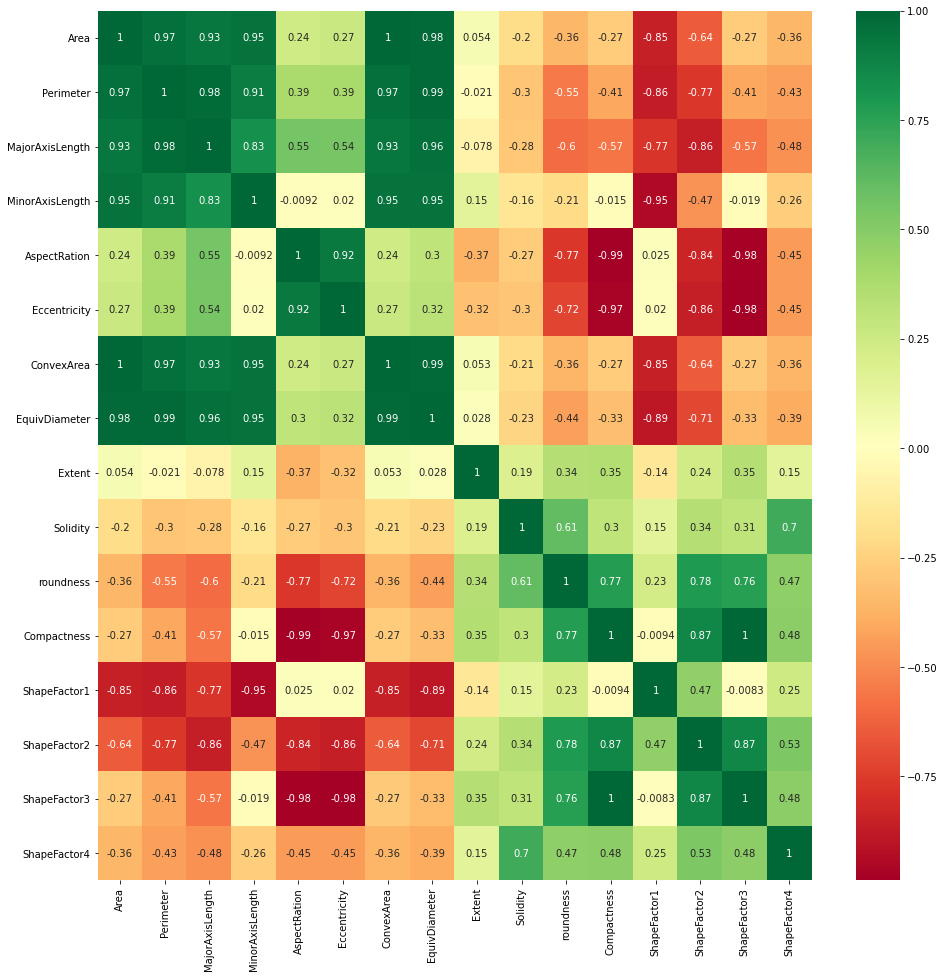

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can clearly see that some features are highly correlated with other features. That is not a good sign. We want low correlated features. So we must select a threshold and only select the features above that threshold. To do this i write this double for loop and set the threshold to 0.9. If correlation score is above threshold i am setting it false on the array that originally all elements are true. After the loop i will only select the ones that are true.(At first i have selected 0.5 for threshold but it only gave 4 feautures and i think 4 feature is too low.)

In [8]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)

for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
print(columns)
selected_columns = X.columns[columns]
selected_df = X[selected_columns]
selected_df

[ True False False False  True False False False  True  True  True  True
  True  True False  True]


Area  AspectRation    Extent  Solidity  roundness  Compactness  \
0      28395      1.197191  0.763923  0.988856   0.958027     0.913358   
1      28734      1.097356  0.783968  0.984986   0.887034     0.953861   
2      29380      1.209713  0.778113  0.989559   0.947849     0.908774   
3      30008      1.153638  0.782681  0.976696   0.903936     0.928329   
4      30140      1.060798  0.773098  0.990893   0.984877     0.970516   
...      ...           ...       ...       ...        ...          ...   
13606  42097      1.552728  0.714574  0.990331   0.916603     0.801865   
13607  42101      1.476439  0.799943  0.990752   0.922015     0.822252   
13608  42139      1.472582  0.729932  0.989899   0.918424     0.822730   
13609  42147      1.489326  0.705389  0.987813   0.907906     0.817457   
13610  42159      1.619841  0.788962  0.989648   0.888380     0.784997   

       ShapeFactor1  ShapeFactor2  ShapeFactor4  
0          0.007332      0.003147      0.998724  
1          0.006979      0.003564      0.998430  
2          0.007244      0.003048      0.999066  
3          0.007017      0.003215      0.994199  
4          0.006697      0.003665      0.999166  
...             ...           ...           ...  
13606      0.006858      0.001749      0.998385  
13607      0.006688      0.001886      0.998219  
13608      0.006681      0.001888      0.996767  
13609      0.006724      0.001852      0.995222  
13610      0.007001      0.001640      0.998180  

[13611 rows x 9 columns]

This is how data looks after feature selection. Only 9 columns left.

In [9]:
selected_df.head()

Area  AspectRation    Extent  Solidity  roundness  Compactness  \
0  28395      1.197191  0.763923  0.988856   0.958027     0.913358   
1  28734      1.097356  0.783968  0.984986   0.887034     0.953861   
2  29380      1.209713  0.778113  0.989559   0.947849     0.908774   
3  30008      1.153638  0.782681  0.976696   0.903936     0.928329   
4  30140      1.060798  0.773098  0.990893   0.984877     0.970516   

   ShapeFactor1  ShapeFactor2  ShapeFactor4  
0      0.007332      0.003147      0.998724  
1      0.006979      0.003564      0.998430  
2      0.007244      0.003048      0.999066  
3      0.007017      0.003215      0.994199  
4      0.006697      0.003665      0.999166

Now we can create another dataframe which is the normalized version of the dataframe we created just yet. After this step we are done with data preparation and we can cluster and classify these 2 dataframes and compare the differences between them.

In [10]:
normalized_df=(selected_df-selected_df.min())/(selected_df.max()-selected_df.min())
normalized_df.head()

Area  AspectRation    Extent  Solidity  roundness  Compactness  \
0  0.034053      0.122612  0.671024  0.922824   0.934823     0.786733   
1  0.035500      0.051577  0.735504  0.871514   0.793138     0.903549   
2  0.038259      0.131521  0.716671  0.932141   0.914511     0.773514   
3  0.040940      0.091623  0.731365  0.761614   0.826871     0.829912   
4  0.041504      0.025565  0.700538  0.949832   0.988408     0.951583   

   ShapeFactor1  ShapeFactor2  ShapeFactor4  
0      0.593432      0.833049      0.980620  
1      0.547447      0.967316      0.974979  
2      0.582016      0.800942      0.987196  
3      0.552408      0.854744      0.893675  
4      0.510741      1.000000      0.989116

In [11]:
normalized_df.describe()

Area  AspectRation        Extent      Solidity     roundness  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.139320      0.397295      0.625380      0.900112      0.765693   
std        0.125212      0.175517      0.157895      0.061783      0.118786   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.067926      0.289902      0.525344      0.880592      0.683497   
50%        0.103469      0.374443      0.657953      0.915228      0.785402   
75%        0.174691      0.485429      0.744779      0.938164      0.852681   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor4  
count  13611.000000  13611.000000  13611.000000  13611.000000  
mean       0.459403      0.493356      0.371445      0.910285  
std        0.177989      0.147006      0.192168      0.083898  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.351551      0.406860      0.190064      0.884146  
50%        0.463478      0.503986      0.364216      0.935698  
75%        0.558634      0.585601      0.517962      0.964454  
max        1.000000      1.000000      1.000000      1.000000

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

Which model will be used? Why? What parameters?


I will be using k-means for clustering because k means is easy to understand and easy to implement. How k means works is it randomly selects cluster centers, assigns the points to the nearest cluster point and calculates the sum of squared error and updates the cluster centers until it reach a point which has the lowest sum of squarred error.

We can use sklearn library to call KMeans, the parameters are :

init : random is used when we want to select cluster centers as random at first to reach the converge state.
n_clusters : random of cluster we want to create.
max_iter : we set the maximum of iteration to find the sweat spot(lowest sse).
random_state : random is used when we want to select cluster centers as random at first

In [12]:
# Bu kısım selected + normalized için
from sklearn.cluster import KMeans

normalizedkmeans = KMeans(init="random",n_clusters=7,n_init=10,max_iter=300,random_state=42)

nkm = normalizedkmeans.fit(normalized_df)

This is the k means model we get using normalized data.We can call .cluster_centers_ to see the centers coordinates. It is multidimentional because we have 7 dimentions.
N_iter_ shows how many iterations are needed to find the sweat spot for the k means algorithm.

In [13]:
normalizedkmeans.cluster_centers_

array([[0.15194997, 0.69527866, 0.71937979, 0.88324519, 0.6228394 ,
        0.1855984 , 0.53022673, 0.15499255, 0.85050236],
       [0.65357675, 0.39893757, 0.71167098, 0.89691567, 0.74800876,
        0.43851546, 0.08654909, 0.0903505 , 0.84836802],
       [0.0892585 , 0.39394653, 0.51158797, 0.90592035, 0.78239796,
        0.44543245, 0.55987081, 0.38111681, 0.9237452 ],
       [0.21837779, 0.43956595, 0.65612763, 0.86065621, 0.67822848,
        0.399654  , 0.35155935, 0.22146693, 0.8676505 ],
       [0.07830256, 0.15296973, 0.69793215, 0.94046738, 0.91047255,
        0.74312211, 0.47799397, 0.65375888, 0.9715162 ],
       [0.06312185, 0.32691568, 0.69733972, 0.91821713, 0.83517386,
        0.51827738, 0.60745762, 0.48963157, 0.94430824],
       [0.14872083, 0.70979218, 0.29373312, 0.87182665, 0.59846463,
        0.17561862, 0.54016422, 0.1518495 , 0.85059131]])

In [14]:
normalizedkmeans.n_iter_

28

This is with the original data. We can see that because it is not normalized, center points are bigger.

In [15]:
# bu kısım selected original için
selectedkmeans = KMeans(init="random",n_clusters=7,n_init=10,max_iter=300,random_state=42)

km = selectedkmeans.fit(selected_df)

In [16]:
selectedkmeans.cluster_centers_

array([[8.57849479e+04, 1.68573333e+00, 7.55867273e-01, 9.84565965e-01,
        8.28056959e-01, 7.69230290e-01, 5.02870421e-03, 1.09050654e-03,
        9.92068585e-01],
       [1.74058771e+05, 1.58762604e+00, 7.76568315e-01, 9.86869393e-01,
        8.64110729e-01, 7.92036664e-01, 3.43788603e-03, 8.40288882e-04,
        9.91796896e-01],
       [2.95865886e+04, 1.46523068e+00, 7.55342426e-01, 9.87942550e-01,
        9.11005830e-01, 8.27158208e-01, 7.97956754e-03, 2.31138121e-03,
        9.96964996e-01],
       [5.83182999e+04, 1.85566982e+00, 7.23773365e-01, 9.85210983e-01,
        8.09545644e-01, 7.36976029e-01, 6.38419779e-03, 1.17293571e-03,
        9.92838386e-01],
       [3.84762261e+04, 1.42666014e+00, 7.58229229e-01, 9.89034903e-01,
        9.14315275e-01, 8.41298996e-01, 6.87542628e-03, 2.14494683e-03,
        9.97021522e-01],
       [4.71777439e+04, 1.64394453e+00, 7.41087853e-01, 9.87724233e-01,
        8.68671266e-01, 7.85671696e-01, 6.65846974e-03, 1.59076412e-03,
        9.9

In [17]:
selectedkmeans.n_iter_

51

Cluster the OD dataset according to the class size of the original dataset from
step 2 (set k to class size).


## Clustering results<a class="anchor" id="clustering"></a>

To see and compare the performances of cluster algorithms we will use silhouette_score from sklearn library which gives a score that shows how succesfull is the model. The higher score the better the model is. This method is used when we have no knowledge about Y labels.It only uses predictedf values. So we can not be %100 sure about this result.

In [18]:
from sklearn.metrics import silhouette_score

normalizedkmeans_silhouette = silhouette_score(normalized_df, normalizedkmeans.labels_).round(2)

selectedkmeans_silhouette = silhouette_score(selected_df, selectedkmeans.labels_).round(2)

In [19]:
selectedkmeans_silhouette

0.54

In [20]:
normalizedkmeans_silhouette

0.29

What we expected is we expected normalized k means to perform better but the result is not we are expecting. This shows that we need better method to compare the performances of these models. 

Instead of silhoutte_score adjusted_rand_score uses Y label and predicted labels so it is better score to evaulate our cluster performance.The higer the score better the clustering is.

In [21]:
from sklearn.metrics import adjusted_rand_score

ari_selectedkmeans = adjusted_rand_score(Y, selectedkmeans.labels_)
ari_normalizedkmeans = adjusted_rand_score(Y, normalizedkmeans.labels_)

In [22]:
round(ari_selectedkmeans, 2)

0.37

In [23]:
round(ari_normalizedkmeans, 2)

0.47

This result is better and as we expected because we expect normalized to perform better because it scales the values in [0 1] and this way data distrubutes better, outliers are limited, input variables will be modeled more realisticly.

Now i will try to show the relation between features and clusters using seaborn library.To do this i am creating a new dataframe using the labels predicted from normalized k means model, concating that with the normalized dataframe. This is the dataframe i obtained.

In [24]:
nlabels = pd.DataFrame(normalizedkmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
nlabeledData = pd.concat((normalized_df,nlabels),axis=1)
nlabeledData = nlabeledData.rename({0:'cluster_labels'},axis=1)
nlabeledData.head()

Area  AspectRation    Extent  Solidity  roundness  Compactness  \
0  0.034053      0.122612  0.671024  0.922824   0.934823     0.786733   
1  0.035500      0.051577  0.735504  0.871514   0.793138     0.903549   
2  0.038259      0.131521  0.716671  0.932141   0.914511     0.773514   
3  0.040940      0.091623  0.731365  0.761614   0.826871     0.829912   
4  0.041504      0.025565  0.700538  0.949832   0.988408     0.951583   

   ShapeFactor1  ShapeFactor2  ShapeFactor4  cluster_labels  
0      0.593432      0.833049      0.980620               4  
1      0.547447      0.967316      0.974979               4  
2      0.582016      0.800942      0.987196               4  
3      0.552408      0.854744      0.893675               4  
4      0.510741      1.000000      0.989116               4

Now i can simply call the below code with the wanted Features, data and cluster labels. We can see the relations between features using these figures. The more can be noticed by the human eye the better the relationship between features.

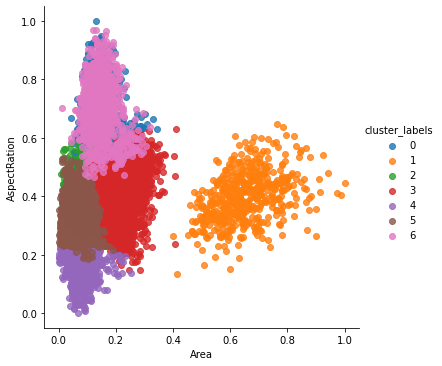

In [25]:
sns.lmplot(x='Area',y='AspectRation',data=nlabeledData,hue='cluster_labels',fit_reg=False)

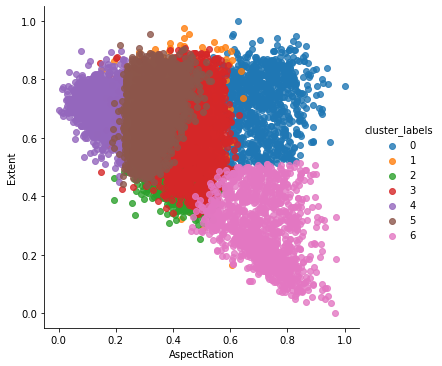

In [26]:
sns.lmplot(x='AspectRation',y='Extent',data=nlabeledData,hue='cluster_labels',fit_reg=False)

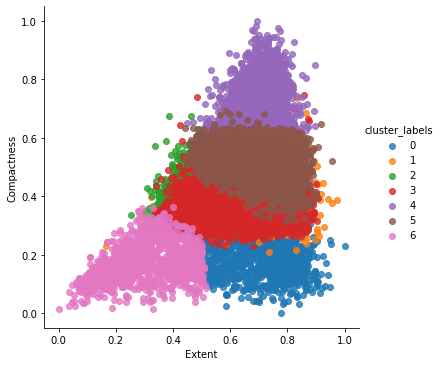

In [27]:
sns.lmplot(x='Extent',y='Compactness',data=nlabeledData,hue='cluster_labels',fit_reg=False)

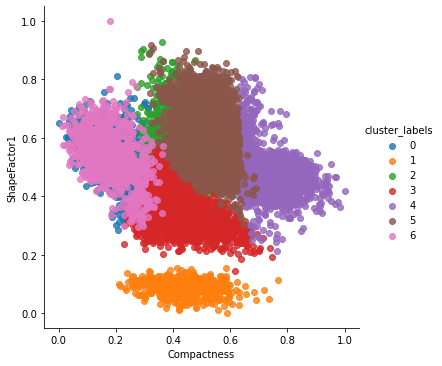

In [28]:
sns.lmplot(x='Compactness',y='ShapeFactor1',data=nlabeledData,hue='cluster_labels',fit_reg=False)

This below code calls the all figures with all the features. This is better to notice significant relationships on the figure. As we see some features clusters the data better than the others. That shows the relationship between them.

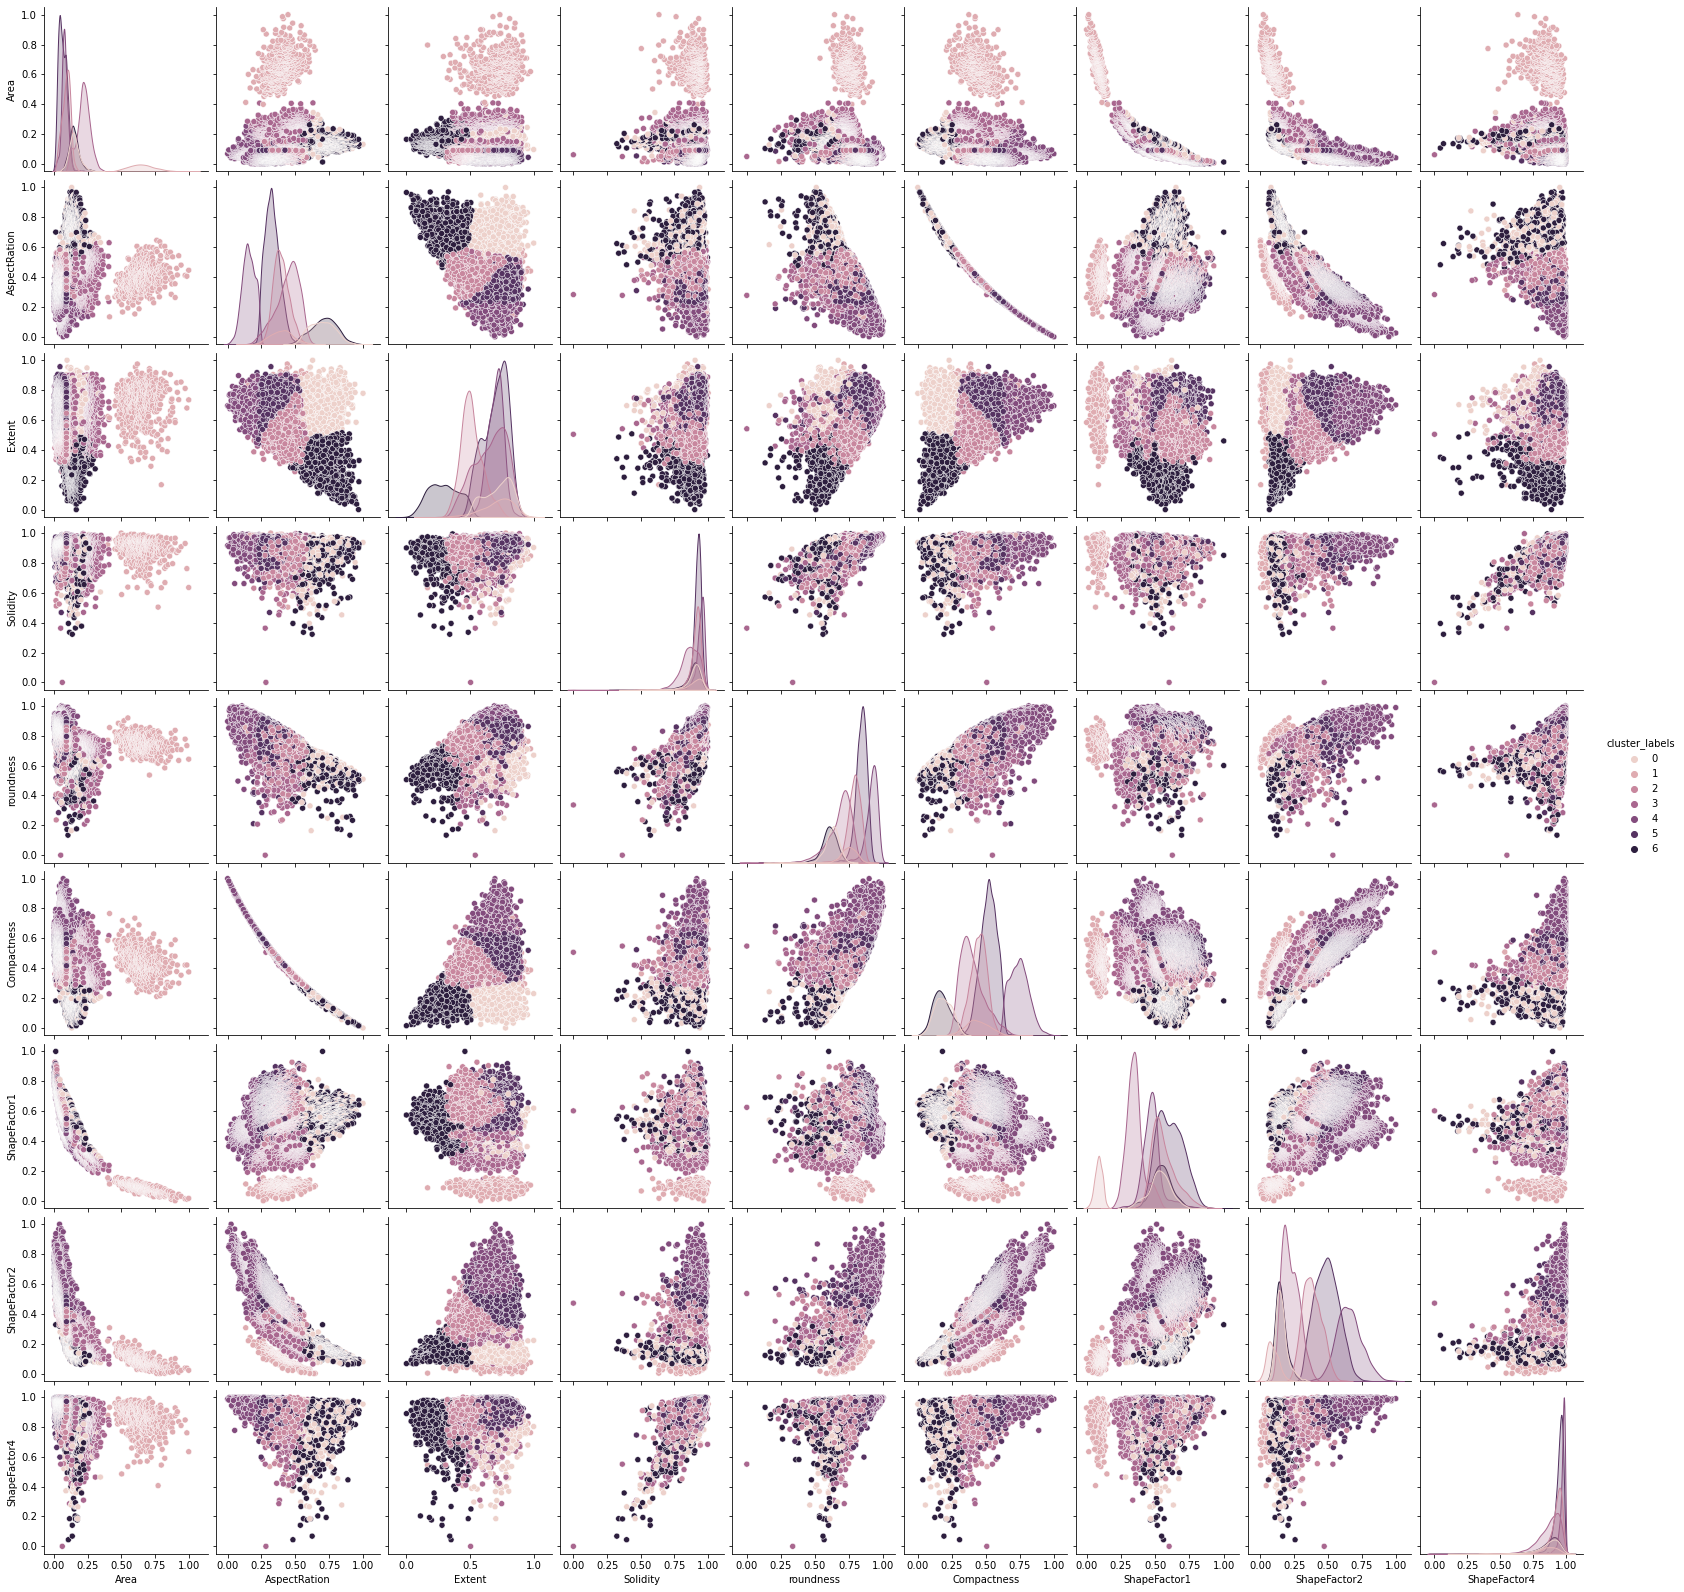

In [29]:
sns.pairplot(nlabeledData,hue='cluster_labels')

Now we do the same things with the original dataframe as well. We will see the differences.

In [30]:
labels = pd.DataFrame(selectedkmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledData = pd.concat((selected_df,labels),axis=1)
labeledData = labeledData.rename({0:'cluster_labels'},axis=1)
labeledData.head()

Area  AspectRation    Extent  Solidity  roundness  Compactness  \
0  28395      1.197191  0.763923  0.988856   0.958027     0.913358   
1  28734      1.097356  0.783968  0.984986   0.887034     0.953861   
2  29380      1.209713  0.778113  0.989559   0.947849     0.908774   
3  30008      1.153638  0.782681  0.976696   0.903936     0.928329   
4  30140      1.060798  0.773098  0.990893   0.984877     0.970516   

   ShapeFactor1  ShapeFactor2  ShapeFactor4  cluster_labels  
0      0.007332      0.003147      0.998724               2  
1      0.006979      0.003564      0.998430               2  
2      0.007244      0.003048      0.999066               2  
3      0.007017      0.003215      0.994199               2  
4      0.006697      0.003665      0.999166               2

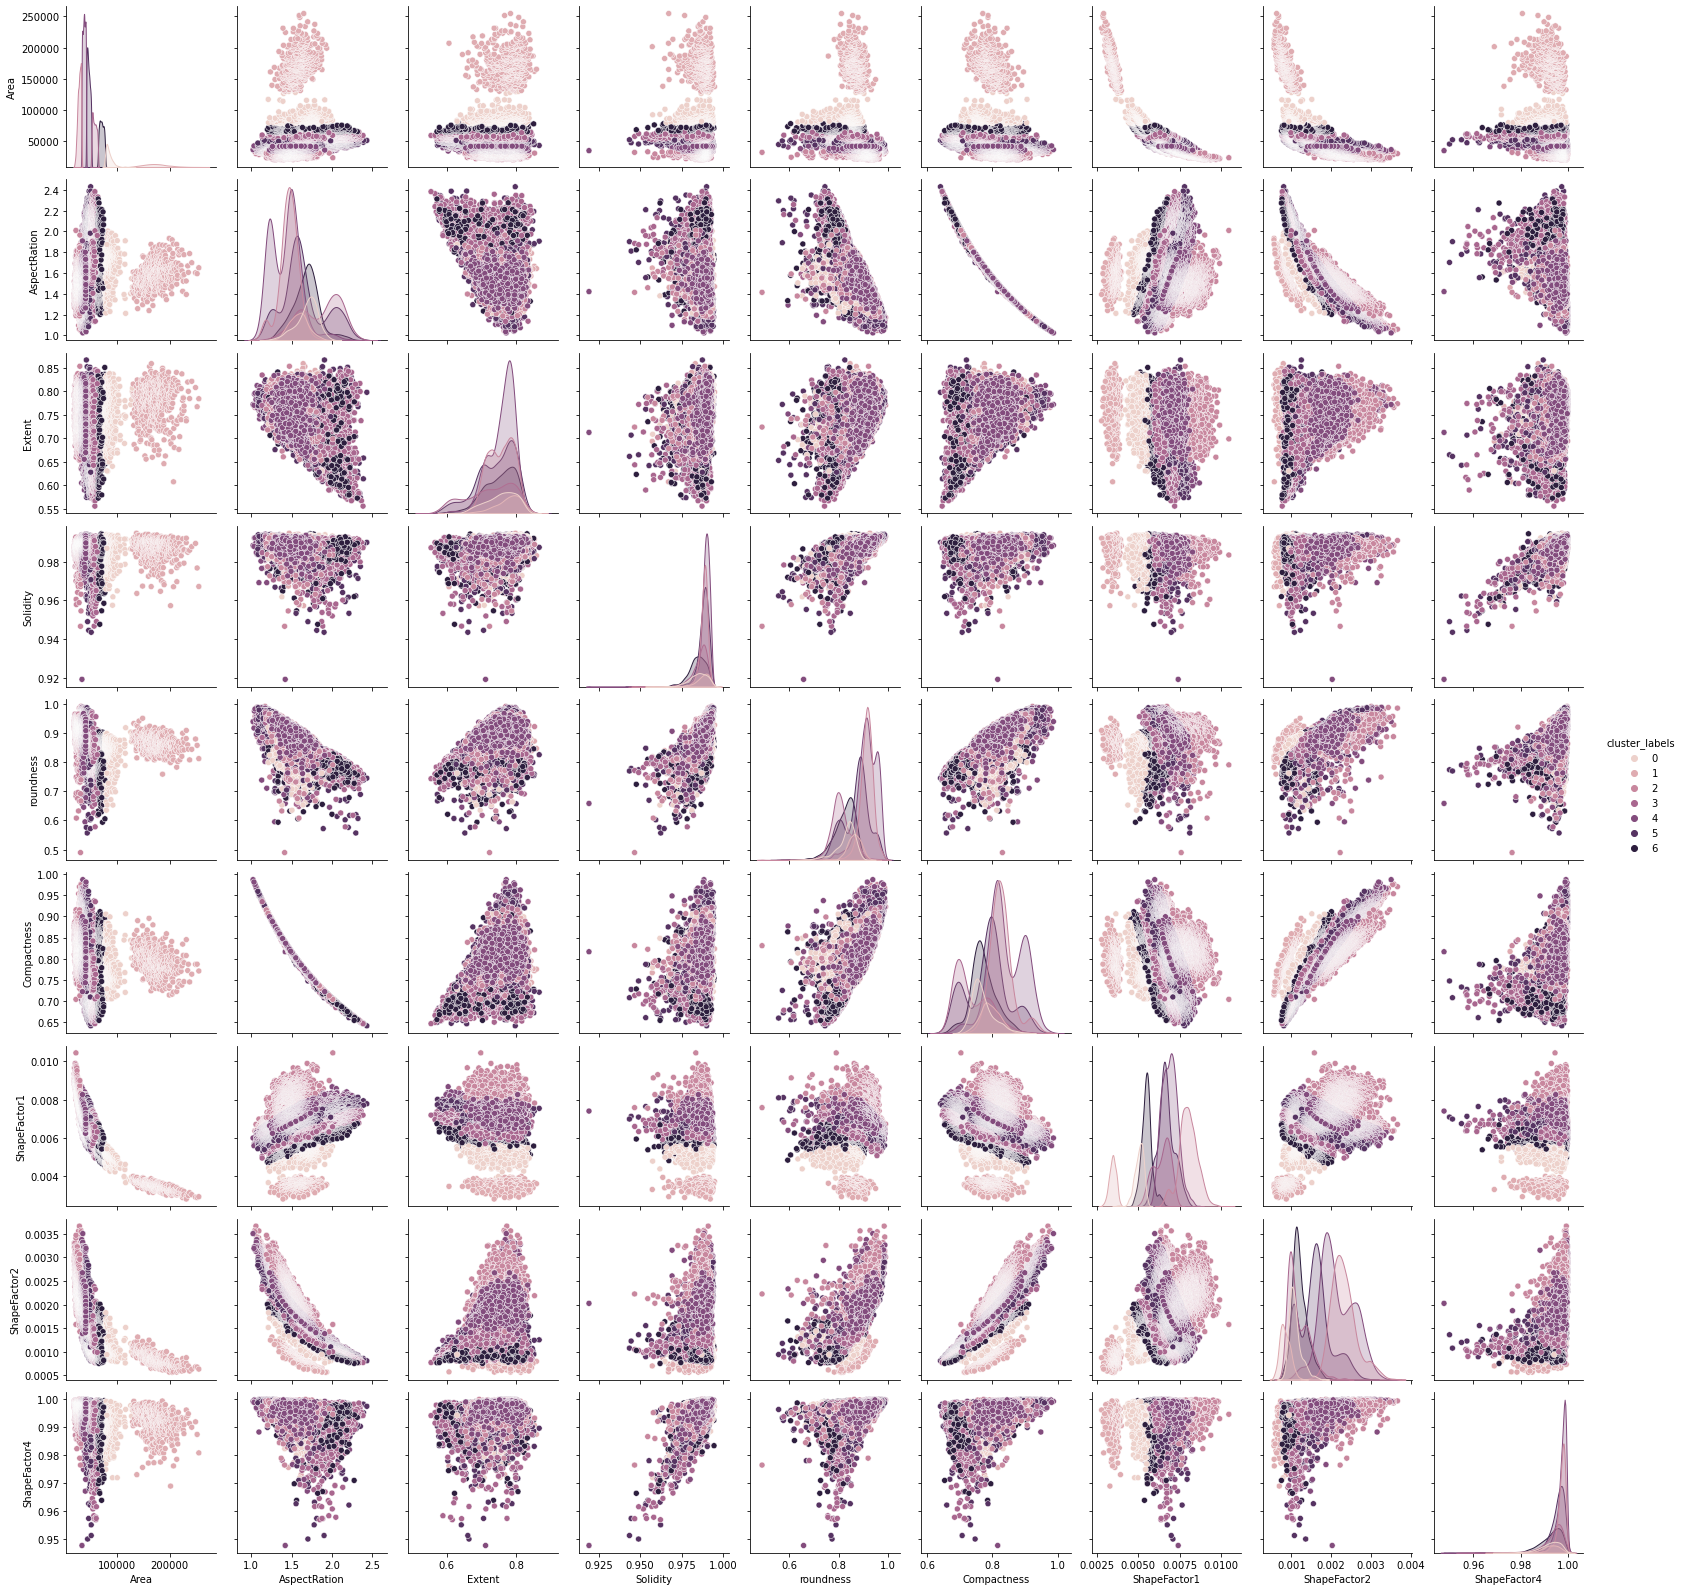

In [31]:
sns.pairplot(labeledData,hue='cluster_labels')

As we see, even with using the same dataframe normalization makes so much difference and because of that cluster performance changes too. 

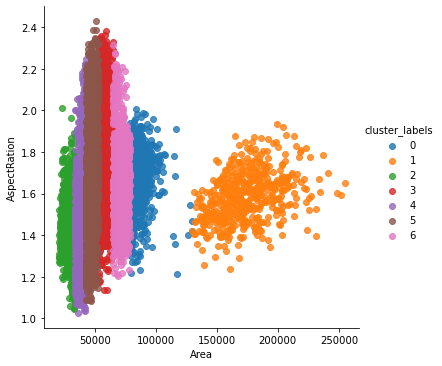

In [32]:
sns.lmplot(x='Area',y='AspectRation',data=labeledData,hue='cluster_labels',fit_reg=False)

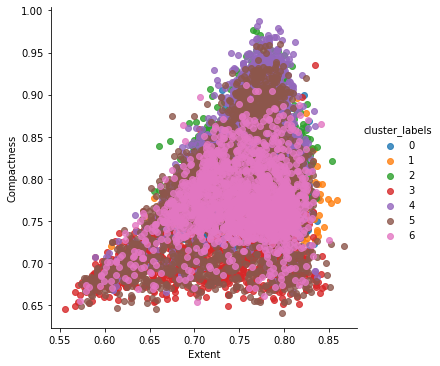

In [33]:
sns.lmplot(x='Extent',y='Compactness',data=labeledData,hue='cluster_labels',fit_reg=False)

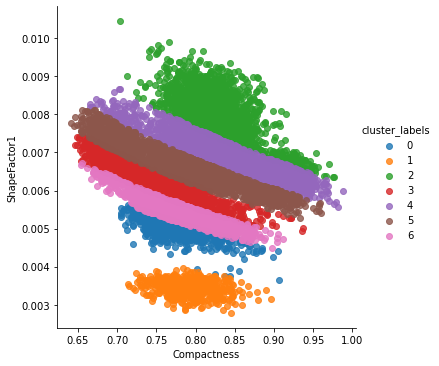

In [34]:
sns.lmplot(x='Compactness',y='ShapeFactor1',data=labeledData,hue='cluster_labels',fit_reg=False)


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

For modeling i have decided to use Desicion Tree, SVM, Naive Bayes since they are easy to implement. By doing that we can compare the results we obtained too.

First lest split the dataset using train_test_split function provided inside sklearn. It will split the %33 of the data as test other as train. I am setting random state = 1 because i want to split the same for normalized dataset as well.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_df, Y, test_size=0.33, random_state=1)

NX_train, NX_test, Ny_train, Ny_test = train_test_split(normalized_df, Y, test_size=0.33, random_state=1)


First model is the Desicion Tree.Desicion tree works with conditional control statements and divides the datas in best possible way which divides best. It is easy to call the model and train the model. After training the model, i am calling predict function to get the predicted values and with this values i am calling metrics.accuracy_score function from sklearn library which calculates the accuracy using predicted and expected values. I am also plotting confusion matrix which is more visual way of seeing models accuracy. It shows correctly predicted values feature by feature.

This is with the original values.

Accuracy: 0.8949243098842387


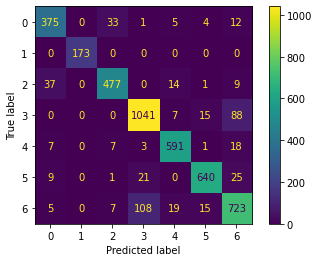

In [36]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, )
cmd.plot()

Accuracy is good, problem got label2 perfect, label3 almost perfect, label6 seems problemetic.

With the normalized values.

Accuracy: 0.8960373998219056


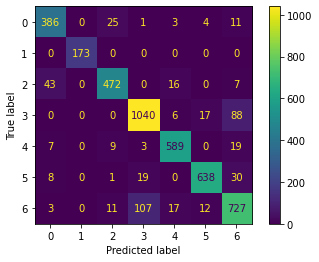

In [37]:
Nclf = tree.DecisionTreeClassifier()

Nclf = Nclf.fit(NX_train, Ny_train)

Ny_pred = Nclf.predict(NX_test)

print("Accuracy:",metrics.accuracy_score(Ny_test, Ny_pred))
cm2 = confusion_matrix(y_test, Ny_pred)
cmd2 = ConfusionMatrixDisplay(cm2, )
cmd2.plot()

Accuracy is good, label6 errors are high, label1 is middle, labble 3 is middle , label2,3,4,5 is good predicted columns.

Now doing the same things with the SVM algorithm.From what i have learned in BBM406, SVM draws a line that is aimed at keeping the line at the maximum distance for the points of both classes. Again we will use accuracy and confusion matrix to analyse.

Accuracy: 0.256233303650935


C:\Users\grupofis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


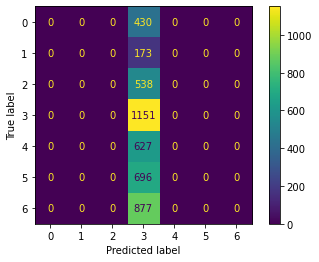

In [38]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
svmpred = SVM.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, svmpred))

cm3 = confusion_matrix(y_test, svmpred)
cmd3 = ConfusionMatrixDisplay(cm3, )
cmd3.plot()

This happened with original data because SVM failed to converge. We need more number of iterations to make better model but i will not do it because i want all of them to be in same state. As we see model only predicted 3. 

With the normalized values.

Accuracy: 0.9089492430988424


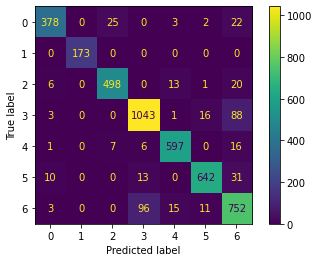

In [39]:
SVM2 = svm.LinearSVC()
SVM2.fit(NX_train, Ny_train)
nsvmpred = SVM2.predict(NX_test)

print("Accuracy:",metrics.accuracy_score(Ny_test, nsvmpred))

cm4 = confusion_matrix(y_test, nsvmpred)
cmd4 = ConfusionMatrixDisplay(cm4, )
cmd4.plot()

Accuracy is best, 6 still seems problemetic, label3 is fixed a little bit more.

Now doing the same things with the Naive Bayes algorithm. This model uses Bayes Teorem we have learned in statistics course. It is based on Bayes teorem with the assumption of conditional independence between every pair of features given the value of the class variable. Again we will use accuracy and confusion matrix to analyse.

Accuracy: 0.6487088156723063


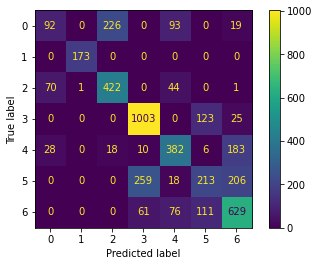

In [40]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()
naivemodel.fit(X_train,y_train)
naivepred = naivemodel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, naivepred))
cm7 = confusion_matrix(Ny_test, naivepred)
cmd7 = ConfusionMatrixDisplay(cm7, )
cmd7.plot()

Accuracyy is low, model got label3 better but label4,5,6,2,1 seems problemetic. Model couldnt learn them.

Accuracy: 0.8984861976847729


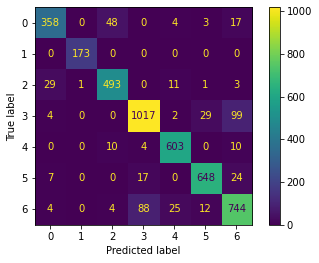

In [41]:
nnaivemodel = GaussianNB()
nnaivemodel.fit(NX_train,Ny_train)
nnaivepred = nnaivemodel.predict(NX_test)

print("Accuracy:",metrics.accuracy_score(Ny_test, nnaivepred))
cm8 = confusion_matrix(Ny_test, nnaivepred)
cmd8 = ConfusionMatrixDisplay(cm8, )
cmd8.plot()

Accuracy is good, column predictions are good, label3 is little bit better than desicion tree, label1 is not perfect , 2 is not perfect. So this model got others good, but lost a little bit from most predicted ones. This means with the right parameters, this can be better than others. Because it generalizes better.

## Evaluation<a class="anchor" id="evaluation"></a>

Desicion Tree Original : 
Accuracy: 0.8942564559216385
Desicion Tree Normalized : 
Accuracy: 0.8922528940338379


SVM Original : 
Accuracy: 0.256233303650935
SVM Normalized : 
Accuracy: 0.9089492430988424


Naive Bayes Original : 
Accuracy: 0.6487088156723063
Naive Bayes Normalized : 
Accuracy: 0.8984861976847729

From this results, I can clearly say that normalization makes accuracy way better than original data. It should be done if possible. From these 3 models, SVM Normalized performed better. But normalized other values performed very close. This can be because of SVM's working prenciple. It draws a line that is aimed at keeping the line at the maximum distance for the points of both classes so it generally makes a good classification in multidimentional space. Desicion Tree makes assumtion about data that may be the reason why it is a little bit lower, Naive Bayes uses Bayes teorem so it might be because of this. But from confusion matrix i think naive bayes is better at generalization because it predicted most false predicteds better and most true predicteds a little bit less true.

I have also tried Neural Networks and its accuracy was around 25 because model was not reaching converge, it was needing more iteration but in this experiment i wanted them to be all safe so i didnt include Neural Network in this example.

Also we can see from confusion matrixs' that label2,label3 is predicted better than others. And mostly label 1 and label 6 has the most false predictions as well. If we want to improve this we might start investigating from these leads. We might add more data to these categories.

## References<a class="anchor" id="references"></a>

https://scikit-learn.org

https://realpython.com/k-means-clustering-python/

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1012763&gclid=Cj0KCQjwmcWDBhCOARIsALgJ2Qdk023-o1axauaD7yGsvmIwaoAB5i0yA2lJzcjwPmj6bx-3XHBZ8bYaAkp9EALw_wcB

https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html

https://www.askpython.com/python/examples/plot-k-means-clusters-python

https://stackoverflow.com/questions/28344660/how-to-identify-cluster-labels-in-kmeans-scikit-learn

https://stats.stackexchange.com/questions/52625/visually-plotting-multi-dimensional-cluster-data

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by 21727432 Ali Kayadibi as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>